In [81]:
from tools import *

In [82]:
import datetime

print(fetch_stock_price("GOOG",
                        datetime.date(2017,1,1),
                        datetime.date(2017,1,31)))

loaded from ./tmp/prices/GOOG_2017-01-01_2017-01-31.pk
[786.14, 786.9, 794.02, 806.15, 806.65, 804.79, 807.91, 806.36, 807.88, 804.61, 806.07, 802.175, 805.02, 819.31, 823.87, 835.67, 832.15, 823.31, 802.32, 796.79]


## visualization

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from tools import fetch_cosine_values, fetch_stock_price, format_dataset
from evaluate_ts import *
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [84]:
# Format the feature and label set
features_size = 5
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, features_size)
print("minibatch_cos_X.shape=", minibatch_cos_X.shape)
print("minibatch_cos_y.shape=", minibatch_cos_y.shape)

minibatch_cos_X.shape= (515, 5)
minibatch_cos_y.shape= (515,)


In [85]:
minibatch_cos_X

array([[1.  , 1.01, 0.9 , 0.92, 1.01],
       [1.01, 0.9 , 0.92, 1.01, 1.02],
       [0.9 , 0.92, 1.01, 1.02, 0.89],
       ...,
       [0.72, 0.62, 0.61, 0.59, 0.55],
       [0.62, 0.61, 0.59, 0.55, 0.39],
       [0.61, 0.59, 0.55, 0.39, 0.46]])

Observation 0: X=[1.   1.01 0.9  0.92 1.01] y=1.0178358888223689
Observation 1: X=[1.01 0.9  0.92 1.01 1.02] y=0.8911697298226989
Observation 2: X=[0.9  0.92 1.01 1.02 0.89] y=0.983549668402699
Observation 3: X=[0.92 1.01 1.02 0.89 0.98] y=0.9206154523975245
Observation 4: X=[1.01 1.02 0.89 0.98 0.92] y=0.7823157163429745


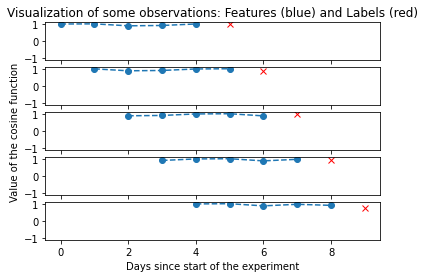

In [86]:
# Print some features of the experiment
samples_to_plot = 5
f, axarr = plt.subplots(samples_to_plot, sharex=True)
for i in range(samples_to_plot):
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]

    print("Observation {}: X={} y={}".format(
        i, feats, label
    ))
    # plt.subplot(samples_to_plot, 1, i+1)
    axarr[i].plot(range(i, features_size + i), feats, '--o')
    axarr[i].plot([features_size + i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])

plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

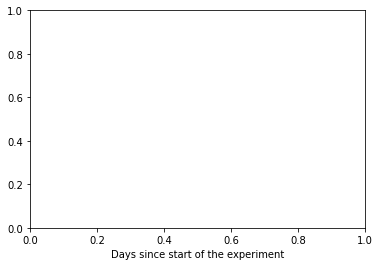

loaded from ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/KO_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/GE_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/GM_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
loaded from ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


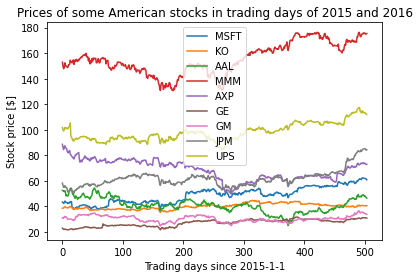

In [87]:
plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

# Print the stock price of 2015 and 2016 for some stocks
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1,1,1)
for sym in symbols:
    prices = fetch_stock_price(
        sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label=sym)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

## 회귀 모형

In [88]:
import matplotlib.pyplot as plt
import numpy as np


tf.reset_default_graph()
tf.set_random_seed(101)

In [89]:
# Settings for the dataset creation
feat_dimension = 20
train_size = 250
test_size = 250

In [91]:
# Settings for tensorflow
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer
n_epochs = 10

#### 훈련, 테스트 데이터셋, 관측행렬

In [92]:
# Fetch the values, and prepare the train/test split
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

In [93]:
# Here, the tensorflow code



X_tf = tf.placeholder("float", shape=(None, feat_dimension), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")

In [95]:
# Here the model: a simple linear regressor
def regression_ANN(x, weights, biases):
    return tf.add(biases, tf.matmul(x, weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean=0.0, stddev=1.0), name="weights")
biases = tf.Variable(tf.zeros([1, 1]), name="bias")


# Model, cost and optimizer
y_pred = regression_ANN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)

Training iteration 0 MSE 5.0622683
Training iteration 1 MSE 4.5287085
Training iteration 2 MSE 4.031893
Training iteration 3 MSE 3.572311
Training iteration 4 MSE 3.1501858
Training iteration 5 MSE 2.7654135
Training iteration 6 MSE 2.4176111
Training iteration 7 MSE 2.106219
Training iteration 8 MSE 1.8305137
Training iteration 9 MSE 1.589523
Test dataset: 1.3722788
Evaluation of the predictions:
MSE: 1.3722789
mae: 1.0471972
Benchmark: if prediction == last feature
MSE: 0.96430165
mae: 0.79347515


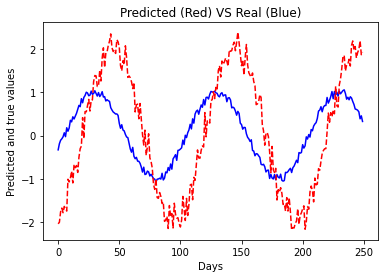

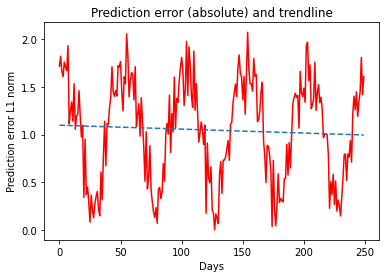

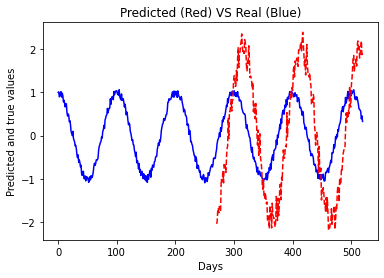

In [96]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X, y_tf: train_y})
        print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values)-test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

## MSFT주식에 적용

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(101)

# Settings for the dataset creation
symbol = "MSFT"
feat_dimension = 20
train_size = 252
test_size = 252 - feat_dimension

# Settings for tensorflow
learning_rate = 0.05
optimizer = tf.train.AdamOptimizer
n_epochs = 1000
